ML, AI, Deep Learning
# ML
Types of ML
* Supervised
    - Regression
    - Classification
* Unsupervised
  * Clustering
  * Dimensionality Reduction
  * Anamoly Detection
  * Association
* Reinforcement
* Semi Supervised
* Batch ML
* Online ML

  
Instance (Memorizing) - KNN  
Model Based Learning


## Challenges

* Data Collection
* Insufficient Data/Labelled Data
* Non representative data
* Irrelevant features (Garbage In, Garbage out)
* Overfitting
* underfitting

### MLOps

### Applications

* Amazon/Big Bazaar - Great Indian Festival sale. Which product to stock or not - data mining. They predict your buying behaviour
* Banking - Loan
* Transportation - OLA. Demand and supply
* Twitter


### Lifecycle

* Frame the problem
* Data Collection
* Data Preprocessing
  * Remove duplicates, outliers
  * Handling Scaling, missing values
* EDA (Exploratory Data Analysis)
  * Visualization
  * Imbalance --> balance
* Feature engineering and selection - creation of new columns
* Model training, evalation and selection




# Tensor
* Data structure
* scalar == 0D tensor (no dimension)
* vector == 1D tensor (1 dim, Axis=1)
* Matrix


Rank of the matrix

multiple 0d tensor = vector
multiple 1d tensor = matrix

4x3x3 Matrix == 3d tensor


In [ ]:
import numpy as np

In [ ]:
arr = np.array([[1,2,3], [1,2,3]])

In [ ]:
arr.ndim

2

In [ ]:
#  4videos*1800(images/min)*480*720*3(rgb channels)
kb = (4*1800*480*720*3/8000)*32

In [ ]:
kb/1000

29859.84

In [ ]:
gb=kb/10**6

In [ ]:
gb

29.85984

In [ ]:
# video encoding format - MP4

In [ ]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/

# !kaggle datasets download -d wobotintelligence/face-mask-detection-dataset


# import zipfile
# zip_ref = zipfile.ZipFile('face-mask-detection-dataset.zip', 'r')
# zip_ref.extractall('/content')
# zip_ref.close()

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/placement predictor/placement.csv")
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df = df.iloc[:,1:]

In [ ]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:-1], df.iloc[:,-1], test_size=0.2, random_state=2)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train_trf = sc.fit_transform(X_train)
x_test_trf = sc.transform(X_test)

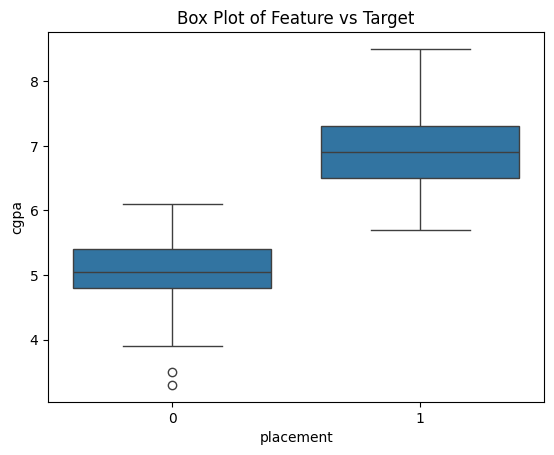

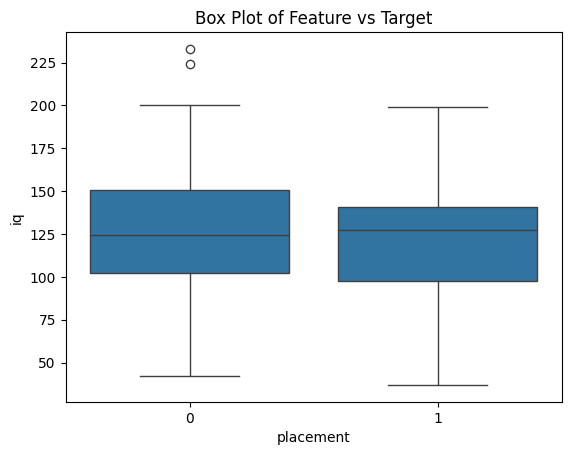

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'feature' is continuous and 'target' is the classification output
sns.boxplot(x='placement', y='cgpa', data=df)
plt.title('Box Plot of Feature vs Target')
plt.show()


sns.boxplot(x='placement', y='iq', data=df)
plt.title('Box Plot of Feature vs Target')
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [ ]:
df.shape

(100, 3)

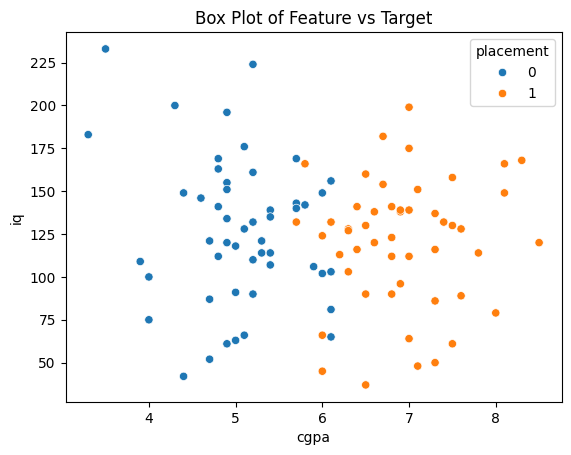

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'feature' is continuous and 'target' is the classification output
sns.scatterplot(x='cgpa', y='iq', hue='placement', data=df)
plt.title('Box Plot of Feature vs Target')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()

In [ ]:
clf.fit(x_train_trf, y_train)

LogisticRegression()

In [ ]:
y_predict = clf.predict(x_test_trf)

In [ ]:
y_predict

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_predict)

0.9

<Axes: >

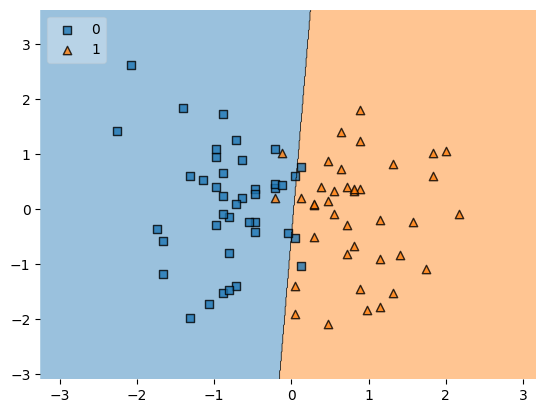

In [ ]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X=x_train_trf, y=y_train.values,clf=clf, legend=2)

In [ ]:
import pickle

pickle.dump(clf, open('/content/placement predictor/clf.pkl', 'wb'))
pickle.dump(sc, open('/content/placement predictor/sc.pkl', 'wb'))

In [ ]:
clf = pickle.load(open('/content/placement predictor/clf.pkl', 'rb'))
sc = pickle.load(open('/content/placement predictor/sc.pkl', 'rb'))

x = pd.DataFrame([
    {
        "cgpa": 6.3,
        "iq": 300
    },
    {
        "cgpa": 6.3,
        "iq": 10
    }
])

In [ ]:
sc.transform(x)

array([[ 0.2988687 ,  4.2380256 ],
       [ 0.2988687 , -2.74806179]])

In [ ]:
clf.predict(sc.transform(x))

array([1, 1])